# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

平方误差可以写做:

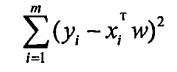

对W求导，当导数为零时，平方误差最小，此时W等于：

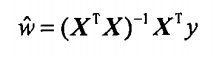

例如有下面一张图片：

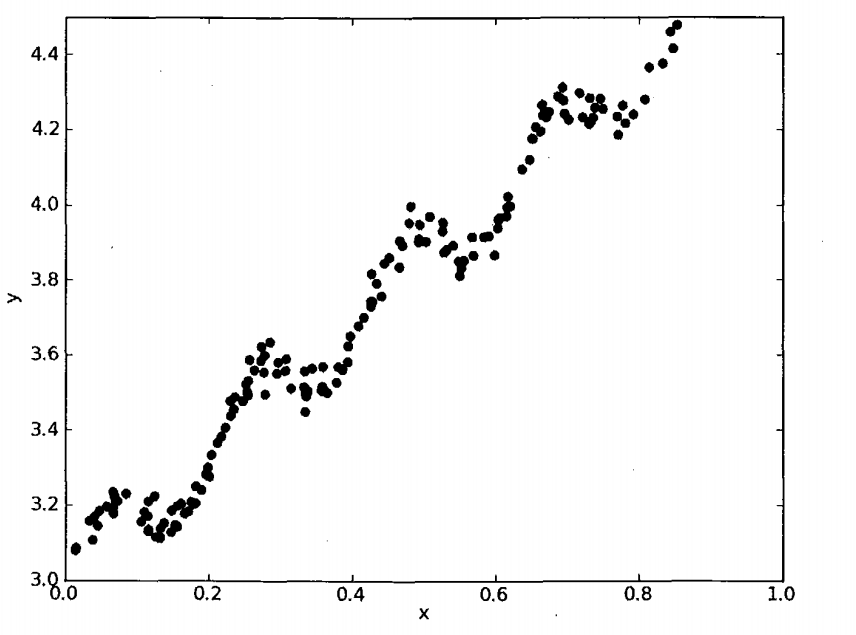

求回归曲线，得到：

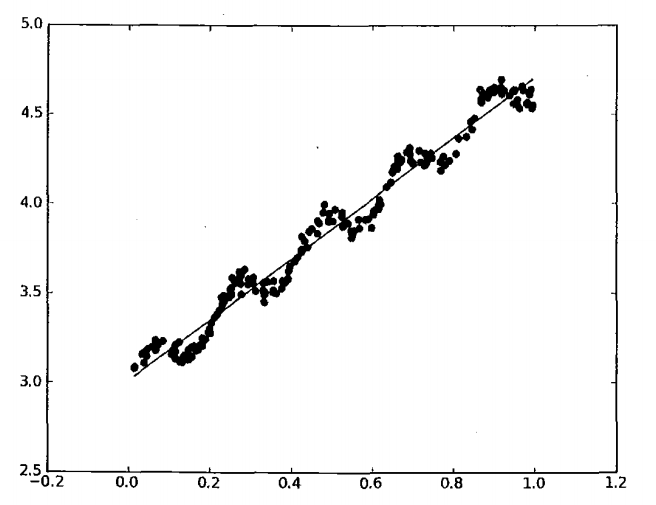

### 2、实例 - 糖尿病数据分析

导包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

获取糖尿病数据
- sklearn.datasets中load_diabetes()函数
    - data 是特征数据
    - feature_names 特征名称
    - target 是目标
- 生成DataFrame查看数据

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [5]:
samples = diabetes.data
target = diabetes.target
display(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
df = DataFrame(samples,
               columns=diabetes.feature_names)
df['target'] = Series(target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
diabetes.DESCR

'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nBradley Efr

In [8]:
samples.shape

(442, 10)

抽取训练数据和预测数据
- 研究bmi指标对血糖的影响趋势, bp字段

In [9]:
bmi = df['bmi'].values.reshape(-1, 1)
bp = df['bp'].values

创建数学模型

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

获取训练数据
- 获取bmi的最小和最大值，生成这个区间的100个等差数例
    - linspace()

In [14]:
bmi_ = np.linspace(df['bmi'].min(),
                   df['bmi'].max(), num=100)

第一步：训练

In [12]:
lr.fit(bmi, bp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

第二步：预测

In [15]:
bp_ = lr.predict(bmi_.reshape(-1,1))

第三步：绘制图形
- 将 测试数据和结果，画出线型图
- 将 训练数据和目标， 画出散点图

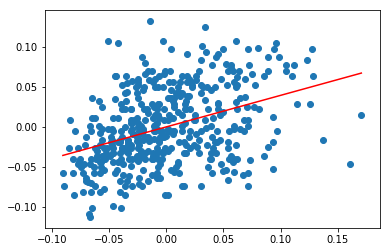

In [16]:
plt.plot(bmi_, bp_, c='r')
plt.scatter(bmi, bp)

扩展
- 获取训练模型后的系数
    - linear.coef_
- 计算得分： r2_score(test_true, test_expect)
    - 是sklearn.metrics 模块的函数

In [17]:
lr.coef_

array([ 0.39541532])

In [18]:
# 比较模型的得分, 使用样本拆分出两部分(训练，预测)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples,
                                                    target,
                                                    test_size=0.2)

In [19]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
y_ = lr.predict(X_test)  # 预测数据

In [21]:
# 比较得分 r2_score(test_T, test_P)
from sklearn.metrics import r2_score
r2_score(y_test, y_)

0.41044969158832834

练习： age和bmi对bp的影响
- 获取age，bmi的实际数据进行模型的训练
- 生成age,bmi的测试数据， 每个特征的(min, max)生成等差数列
- 使用测试数据，进行测试
- 画出实现数据的散点图和线型图（两个）

In [22]:
age = np.linspace(df['age'].min(),
                  df['age'].max(), num=100)
bmi = np.linspace(df['bmi'].min(),
                  df['bmi'].max(), num=100)

# age_g, bmi_g = np.meshgrid(age, bmi)  # 表格化处理
# age_bmi = np.c_[age_g.ravel(), bmi_g.ravel()]

In [36]:
# ax子画布对象, field 指定哪一个字段与bp比对
def line_pd(ax, field, num=100):
    # p的指定field的[min,max]区间的最大值和最小值
    p = np.linspace(df[field].min(),
                   df[field].max(), num=num)
    
    # 训练数据
    lr.fit(df[field].values.reshape(-1, 1),
           df['bp'].values)
    
     # 预测结果
    y_ = lr.predict(p.reshape(-1, 1)) 
    
    ax.plot(p, y_)  # 预测的线
    ax.scatter(df[field].values, df['bp'].values, c='r')
    ax.set_title(f'{field} Vs bp')

In [38]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


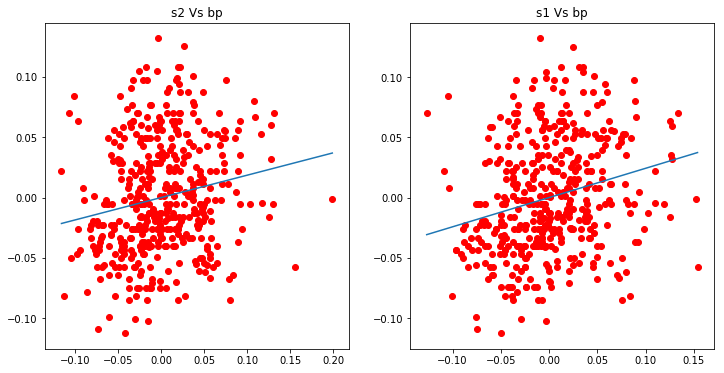

In [40]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(121)
line_pd(ax1, 's2')

ax2 = plt.subplot(122)
line_pd(ax2, 's1')

plt.show()

## 二、岭回归

In [ ]:
f(x) = w1*x1 + w2*x2 + w3*x3

1   2  4  7
2   5  3  2
3   6  1  9



# 有解方程
1 = a*2 + b*4 + c*7
2 = a*5 + b*3 + c*2
3 = a*6 + b*1 + c*9


1   2  4  7
2   5  3  2


# 无解方程
1 = a*2 + b*4 + c*7
2 = a*5 + b*3 + c*2


# 不满秩矩阵 不能求逆
# 数据样本的个数 < 数据特征的个数 需要使用岭回归
# 多重共性
2  4  7        1 0 0      3  4  7
5  3  2   + λ* 0 1 0  =   5  4  2  -> 可以求逆 -> 线性回归模型就可用了
               0 0 1      0  0  1   

### 1、原理

缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

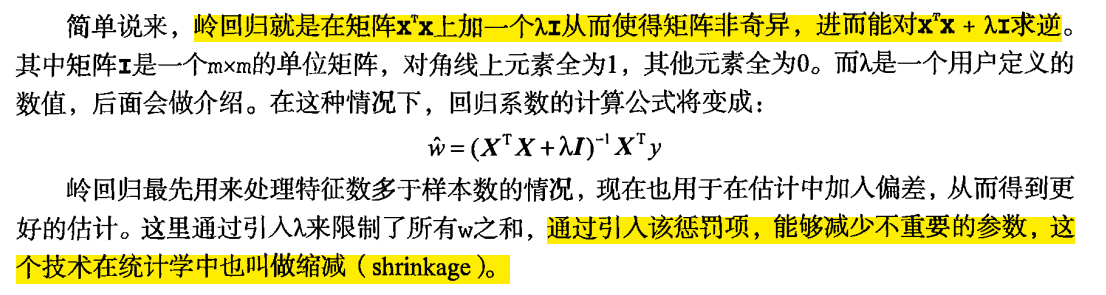

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

#### 归纳总结

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

岭回归一般用于样本值不足的时候
- sklearn.linear_model模块中 Ridge

In [45]:
from sklearn.linear_model import Ridge

不满轶矩阵数据样本数据
- X_train = [[2,1,1],[1,2,3]]
- y_train = [3, 1]

In [42]:
# 电影分类： 动作片-1， 枪战片-3， 爱情片-2
#           打斗，  开枪，   接吻
X_train = [[10, 15, 8],
           [11, 1, 5]]
y_train = [3, 1]

使用普通线性回归
- LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

使用岭回归
- Ridge(alpha=1) alpha指定偏差系数λ

In [53]:
ridge = Ridge(alpha=1) # alpha=0,Ridge就是普通的线性回归

In [54]:
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

比较它们之间的系数
- coef_ 所有的特征系数
- Ridge()的alpha 无限接近0时，同线性回归几乎相同
    - 其实alpha 为0就是线性回归，不过系统会提示一些警告而已

In [52]:
display(lr.coef_,  ridge.coef_)

array([-0.00970874,  0.13592233,  0.02912621])

array([-0.00970874,  0.13592233,  0.02912621])

### 【扩展】深入研究岭回归

- 理解岭回归缩减系数

【备注】coef_函数可以获取机器学习模型中各个特征值的系数

#### 创建一个假象数据样本集
- 生成一个10×10的二维数组 和 10个目标值
    - X = 1 / (np.arange(1, 11) + np.arange(0, 10).reshape(-1, 1))
    - y = np.linspace(0, 10, num=10)
- 创建 100个 alpha系数， 范围在 [e^-10, e^-2]
    - np.logspace(-10, -2, 100)  生成e指数的等差数列

In [56]:
X = 1/(np.arange(1, 11) + np.arange(0, 10).reshape(-1,1))
X.shape

(10, 10)

In [58]:
y = np.linspace(0, 10, num=10)
y.shape

(10,)

#### 根据不同的alpha ，训练X和y, 并收集coef_系统数
- 设置 Rigde的alpha参数： ridge.set_params(alpha=alpha) 
- coefs.append(ridge.coef_) 

In [68]:
ridge = Ridge()
# 以log方式生成等差队列
alphas = np.logspace(-10, -2, num=100)
coefs = []  # 所有的系数
for alpha in alphas:
    # 设置model模型对象的参数
    ridge.set_params(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)  # 添加w系数

#### 绘制线型图，查看alpha与coefs的关系
- plt.plot(alphas, coefs)
- plt.xscale('log') 坐标刻度的缩放比较为 指数形式

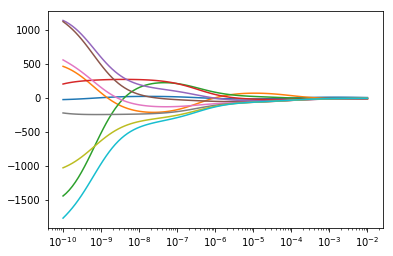

In [69]:
plt.plot(alphas, coefs)
plt.xscale('log') # 设置x坐标的刻度的比例
plt.show()

## 三、lasso回归

### 1、原理

【拉格朗日乘数法】

对于参数w增加一个限定条件，能到达和岭回归一样的效果：

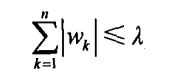

在 λ (lambda) 足够小的时候，一些系数会因此被迫缩减到0

### 2、实例－波士顿房价数据分析

加载数据
- sklearn.datasets 模块的 load_boston()
- sklearn.model_selection 模块的 train_test_split() 分出训练数与测试数据

In [70]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [71]:
boston = load_boston()
samples = boston.data
target = boston.target

df = DataFrame(samples,
               columns=boston.feature_names)

In [72]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [73]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

比较得分 和 系数
- Ridge(alpha=0.8)
- Lasso(alpha=0.0006)
- sklearn.metrics.r2_score()

In [74]:
from sklearn.linear_model import Lasso

ridge = Ridge(alpha=0.8)
lasso = Lasso(alpha=0.0006)

In [77]:
# 训练数据
X_train, X_test, y_train, y_test = train_test_split(samples,
                                                    target,
                                                    test_size=0.15)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
# 预测数据，并且查看得分
# 修改不同的alpha参数值，并重新训练和预测
ridge.set_params(alpha=1)
lasso.set_params(alpha=0.000001) # alpha系数越小，得分越高

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_y = ridge.predict(X_test)
lasso_y = lasso.predict(X_test)

print('ridge score:', r2_score(y_test, ridge_y))
print('lasso score:', r2_score(y_test, lasso_y))
print(lasso.coef_)

ridge score: 0.629699147533
lasso score: 0.625753493256
[ -1.04535030e-01   4.43770371e-02   4.44588173e-02   2.80863439e+00
  -1.88881277e+01   4.17475392e+00  -8.49848498e-03  -1.57799663e+00
   2.84931511e-01  -1.26269452e-02  -9.49088547e-01   8.38231465e-03
  -4.90293315e-01]


## 四、普通线性回归、岭回归与lasso回归比较

随机生成训练数据和测试数据
- np.random.seed(42) 指定种子
- 生成 50 行、200个特征的正态分布的样本数
- 生成系数（与特征量相同）的正态分布数 * 3， 即为 coefs
- 系数归零化
    - 获取系数索引, inds = np.arange(n_features)
    - 打乱顺序, np.random.shuffle(inds)
    - 对系数进行归零化处理, coefs[inds[10:]] = 0
- 生成目标值 y 
    - 样本数据与系数进行矩阵积的结果， y = np.dot(x, coef)
    - 对目标值加噪音， y += 0.01*np.random.normal(n_samples)

In [91]:
np.random.seed(42)
samples = np.random.randn(50, 200)
coefs = np.random.randn(200)*3

In [93]:
index = np.arange(coefs.size)  # coefs系数的索引
np.random.shuffle(index)
index

array([112,  39, 159, 167, 115, 187,  26,  11,  80, 113, 180,  71,  49,
       148,   4, 127, 195, 158,  79,  54,  16,   6, 114,  27, 161, 182,
        28,  74,  87, 121,  25, 147, 141,  42, 189, 166, 162, 156, 192,
        96, 125, 160, 117,  38,  72,  40, 100, 151,  12,  97,  70,  60,
        67, 194,  66,   7, 157, 193, 170,  10,  98,  47, 109,  68, 178,
       154,   8,  31,  57,  35,  99, 168,  18, 128, 129,  81,  32,  94,
       138,  73,  34, 108, 130, 105,  56,  65, 185, 177, 186, 150,  24,
        53, 119, 145,  82, 173,  30,  29, 116,   3, 140,  64,   5, 126,
        44,  84,  91,  13,  92,  21, 131,   0,  48, 110, 102, 184,   2,
        62,  93,  86, 164,   1, 174,  19,  17,  36,  95,  15, 103, 196,
       143, 149, 153, 169,  41,  78, 190, 134, 139, 107,  20,  69, 122,
       135,  76, 123,  33, 198,  50, 104,  14, 176, 101, 152, 120, 171,
       124, 181,  58,  55,  85, 163, 165, 155, 118, 199, 197, 144,  23,
       175,  90, 183,  83, 188,  45,  51,  43,  22, 191,  52,  7

In [96]:
coefs[index[10:]] = 0

In [98]:
samples.shape

(50, 200)

In [100]:
y = np.dot(samples, coefs) # 生成的实际的训练数据目标

In [101]:
y_roise = y+ 0.01 * np.random.normal(y.size)
y_roise

array([  2.35193526,  -1.38446556,  -2.73015004,  -0.79899244,
        12.70759875,   3.59573237,   1.33050094,  13.10296718,
         3.78779004,   1.9101218 ,  -8.74654883,   1.32182677,
        -4.88743747,   9.23866556, -15.73473813,   8.11674925,
       -10.39985162,  -5.38265962,  -1.2577366 ,   0.0339359 ,
        -5.39764872,  18.26142178,  -3.48096496, -19.40094038,
        -2.26133609,  -6.57715689,   4.2471622 ,  20.56590595,
        -3.65814425,  -7.74416858,   4.76542452,   3.83409686,
        13.7021449 ,   2.94624467, -10.01725411, -13.4124571 ,
        -5.26695084,  -1.23850403, -18.4657806 ,  -9.27585596,
         8.88442821,  -9.34190925,  16.04437011,   0.65541897,
        -6.19233755,  -2.95985316,  -9.95442772,  -5.38772782,
        -6.33665554,  -0.48322829])

分别使用线性回归，岭回归，Lasso回归进行数据预测

In [102]:
lr = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.006)

lr.fit(samples, y)
ridge.fit(samples, y)
lasso.fit(samples, y)

Lasso(alpha=0.006, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

数据视图，此处获取各个算法的训练数据的coef_:系数

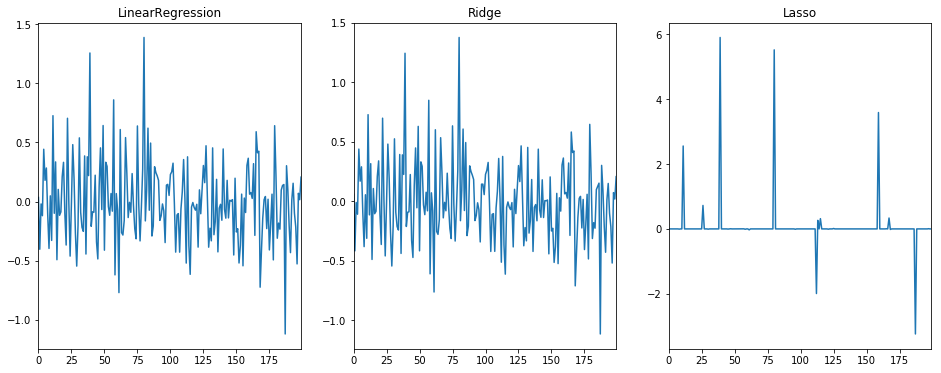

In [108]:
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(131)
Series(lr.coef_).plot(ax=ax1) # 将图形显示到指定的子画布中
ax1.set_title('LinearRegression')

ax2 = plt.subplot(132)
Series(ridge.coef_).plot(ax=ax2)
ax2.set_title('Ridge')

ax3 = plt.subplot(133)
Series(lasso.coef_).plot(ax=ax3)
ax3.set_title('Lasso')

plt.show()

## 五、练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

### 2、预测鲍鱼的年龄

abalone.txt

In [135]:
data = pd.read_csv('../data/abalone.txt', sep='\t', header=None)

In [136]:
data.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [137]:
data.shape

(4177, 9)

In [141]:
# 最后一列是年龄
y = data[8]  # 目标
X = data.drop(labels=8, axis=1) # 删除特征的列

In [143]:
X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [152]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)
y_ = lasso.predict(X_test)

In [153]:
# 计算预测得分
# sklearn.metrices模块下的计算得分函数
r2_score(y_test, y_)

0.51293569678612272

In [154]:
lasso.score(X_test, y_test)

0.51293569678612272